# import 

In [8]:
%load_ext autoreload

In [11]:
import pandas as pd
from modules.constants import LocalPaths
from modules.simulation import XGBSimulation, XGBSimulation2, TechnicalSimulation, CeilSimulation
from modules.training import LearnXGB
from modules import funcs


In [10]:
%autoreload



# XGB の学習のさせ方

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


---------------------
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       248
           1       0.48      0.52      0.50       320
           2       0.51      0.51      0.51       246

    accuracy                           0.49       814
   macro avg       0.49      0.49      0.49       814
weighted avg       0.49      0.49      0.49       814



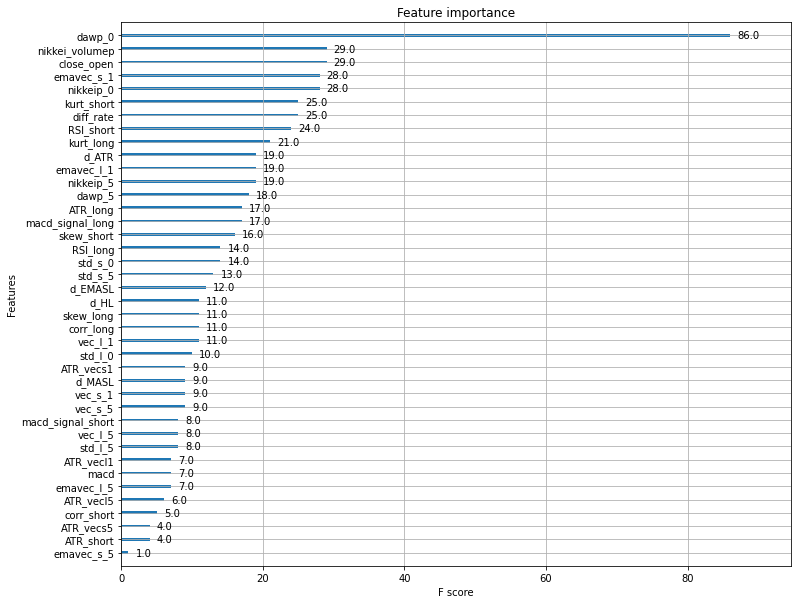

In [12]:
"""
    num_class : 分類するクラス数
                default = 2
                2 クラス　または 3 クラス分類
                2 クラス分類　-> UP or DOWN の予測
                3 クラス分類  -> UP or STAY or DOWN の予測
"""
lx = LearnXGB(num_class=3)
lx.learn_xgb(LocalPaths.RAW_TOPIX_PATH,LocalPaths.RAW_DAW_PATH)

# simulation 

## xgb　simulation

   total_profit  profit rate  trade_count  max_profit  min_profit  \
1          56.5         2.26           34       154.0       -89.0   

   mean_profit  cant_buy_count  
1     1.661765               0  

      score  Up precision  Stay precision  Down precision  Up recall  \
0  0.456432      0.507246        0.441441         0.42623   0.472973   

   Stay recall  Down recall  up_num  stay_num  down_num  
0     0.544444     0.337662    74.0      90.0      77.0  

trigger_count : 1


<Figure size 432x288 with 0 Axes>

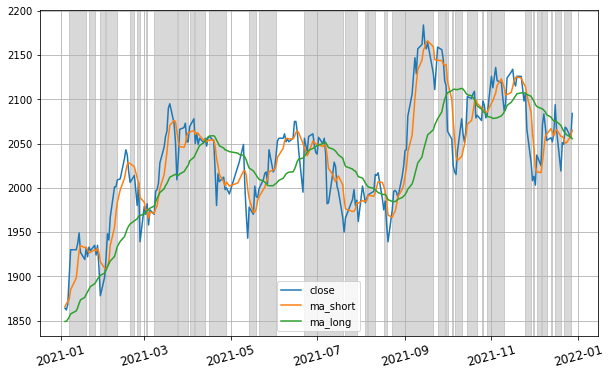

In [31]:
"""
total_profit    : 1株あたりの利益, 下の例では 150.5 円の利益, 通常100株なので15,050円程の利益
profit rate     : 資本金25万円あたりの収益率, 下の例では 6.02%
trade_count     : simulation期間内の取引回数, 下の例では 19 回
max_profit      : simulation期間内の一回の取引での最大利益, 下の例では134円/株
min_profit      : simulation期間内の一回の取引での最小利益, 下の例では-75円/株
mean_profit     : 取引一回当たりの平均収益, 下の例では7.92円/株
cant_buy_count  : 余力が足りなく, 買えなかった回数
trigger_count   : 短期的取引としているため, 20日以上保有しようとした場合, 強制的に売り出す. その回数
"""

# sl = XGBSimulation(lx) # 2クラス分類の時
# 3 クラス分類の時は, XGBSimulation2 でsimulate する
sl = XGBSimulation2(lx)
sl.simulate(
            LocalPaths.RAW_TOPIX_PATH,  # csv ファイルを読み込むためのパス
            LocalPaths.RAW_DAW_PATH,    # DAW のファイル
            start_year=2021,            # simulate 開始の年
            end_year=2021,              # simulate 終了の年
            start_month=1,              # simulate 開始の月
            end_month=12,               # simulate 開始の月
            strategy='normal',          # 'normal' -> 順張り戦略, 'reverse' -> 逆張り戦略
            is_variable_strategy=False  # 順張り, 逆張り両方使う戦略
            )



## Technical 分析 simulation

   total_profit  profit rate  trade_count  max_profit  min_profit  \
1         583.5        23.34           74       583.5       -98.0   

   mean_profit  cant_buy_count  
1    15.193333               0  



<Figure size 432x288 with 0 Axes>

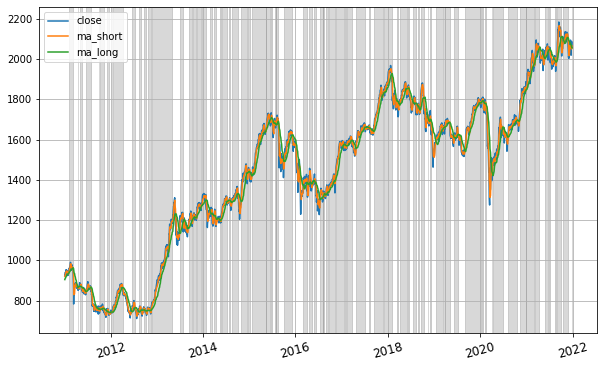

In [38]:
ts = TechnicalSimulation(
    ma_short=5,     # 短期移動平均線　5日分
    ma_long=25,     # 長期移動平均線
    hold_day=100,   # ゴールデンクロスが発生してから, 最長何日保有するか決める, 先にデッドクロスが発生した場合は売りを優先
)

ts.simulate(
    LocalPaths.RAW_TOPIX_PATH,
    LocalPaths.RAW_DAW_PATH,
    start_year=2011,
    end_year=2021,
    start_month=1,
    end_month=12
)

## 天井度　simulation

   total_profit  profit rate  trade_count  max_profit  min_profit  \
1        -125.0         -5.0            8        70.0      -392.0   

   mean_profit  cant_buy_count  
1      -15.625               0  

trigger_count : 5


<Figure size 432x288 with 0 Axes>

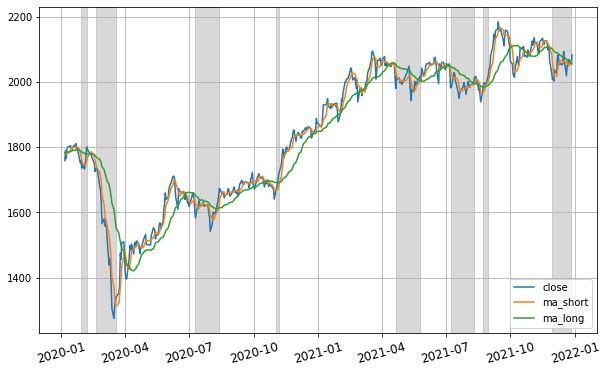

In [43]:
cs = CeilSimulation(
    alpha=0.8,
    beta=0.01
)

cs.simulate(
    LocalPaths.RAW_TOPIX_PATH, 
    LocalPaths.RAW_DAW_PATH,
    start_year=2020,
    end_year=2022,
    start_month=1,
    end_month=12,
    is_observed=False,
    width=30,
    stride=1
    )


In [13]:
value_list = funcs.make_value_list(
    lx,
    2021,
    2021,
    LocalPaths.RAW_TOPIX_PATH,
    LocalPaths.RAW_DAW_PATH,
    alpha=0.34,
    width=20,
    stride=10,
    start_month=1,
    end_month=12
    )

division by zero
division by zero


In [ ]:
uds_dict_3,trade_dict,F_lis_dict = funcs.return_uds_dict(
    value_dict_w20,
    lx_dict_w20,
    width=20,
    stride=5,
    window_type='bla',
    is_high_pass=False,
    is_low_pass=True,
    is_ceps=False,
    cut_off=2,
    order=4,
    path_=LocalPaths.RAW_TOPIX_PATH,
    limit_year=2016
    )